# Optical distortion models

**Author:** Yannick Copin <y.copin@ipnl.in2p3.fr>

**Abstract:** the `spectrogrism.distortion` module implements different distortion models, including the Brown-Conrady distortion model.

In [1]:
# Technical stuff related to the Jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import warnings
warnings.filterwarnings("ignore")

## Geometrical distortions 

In [2]:
import numpy as N
from spectrogrism.distortion import GeometricDistortion

The `GeometricDistortion` class implements the Brown-Conrady (achromatic) distortion model:
$$
\begin{align}
x_d &= x_u \times (1 + K_1 r^2 + K_2 r^4 + \ldots) \\
    &+ \left(P_2(r^2 + 2x_u^2) + 2P_1 x_u y_u\right)
       (1 + P_3 r^2 + P_4 r^4 + \ldots) \\
y_d &= y_u \times (1 + K_1r^2 + K_2r^4 + \ldots) \\
    &+ \left(P_1(r^2 + 2y_u^2) + 2P_2 x_u y_u\right)
       (1 + P_3 r^2 + P_4 r^4 + \ldots)
\end{align}
$$
where:

- $x_u + j y_u$ is the undistorted complex position,
- $x_d + j y_d$ is the distorted complex position,
- $r^2 = (x_u - x_0)^2 + (y_u - y_0)^2$
- $x_0 + j y_0$ is the complex center of distortion.

The K-coefficients (resp. P-coefficients) model the *radial* (resp. *tangential*) distortion.

**Reference:** [Optical distortion](https://en.wikipedia.org/wiki/Distortion_%28optics%29)

### Radial distortions

Geometric distortion: center=(+0, +0), K-coeffs=[-0.05], P-coeffs=[]


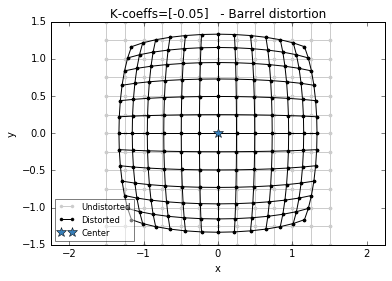

In [3]:
barrel = GeometricDistortion(Kcoeffs=[-0.05])
print(barrel)
ax = barrel.plot()
ax.set_title(ax.get_title() + " - Barrel distortion");

In [4]:
xyu = 1. + 1j
xyd = barrel.forward(xyu)
try:
    assert(N.isclose(xyu, barrel.backward(xyd)))
except RuntimeError:
    print("Distortion is not invertible.")
except AssertionError:
    print("Distortion inversion is invalid.")
else:
    print("Distortion inversion is OK.")

Distortion inversion is OK.


Geometric distortion: center=(+0, +0), K-coeffs=[ 0.05], P-coeffs=[]


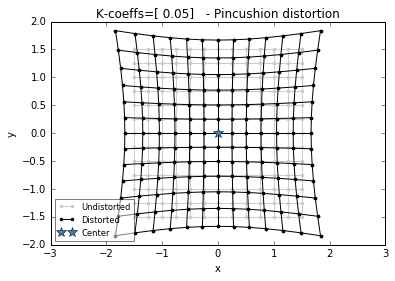

In [5]:
cushion = GeometricDistortion(Kcoeffs=[+0.05])
print(cushion)
ax = cushion.plot()
ax.set_title(ax.get_title() + " - Pincushion distortion");

Geometric distortion: center=(+0, +0), K-coeffs=[-0.07  0.01], P-coeffs=[]


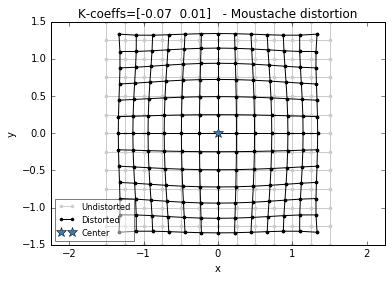

In [6]:
moustache = GeometricDistortion(Kcoeffs=[-0.07, +0.01])
print(moustache)
ax = moustache.plot()
ax.set_title(ax.get_title() + " - Moustache distortion");

### Tangential distortions

First two P-coefficients will correspond to a purely tangential distortion, while higher order cofficients will introduce radial dependencies.

Geometric distortion: center=(+0, +0), K-coeffs=[], P-coeffs=[ 0.05  0.  ]


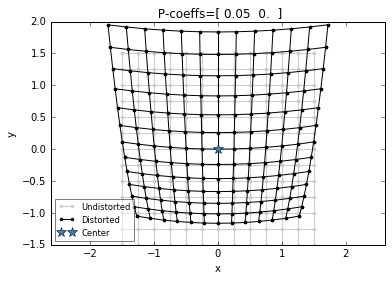

In [7]:
td1 = GeometricDistortion(Pcoeffs=[+0.05])
print(td1)
ax = td1.plot()

Geometric distortion: center=(+0, +0), K-coeffs=[], P-coeffs=[ 0.   -0.05]


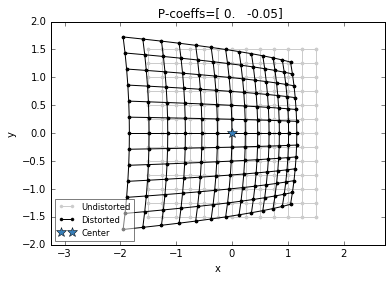

In [8]:
td2 = GeometricDistortion(Pcoeffs=[0, -0.05])
print(td2)
ax = td2.plot()

Geometric distortion: center=(+0, +0), K-coeffs=[], P-coeffs=[ 0.05 -0.05  0.02]


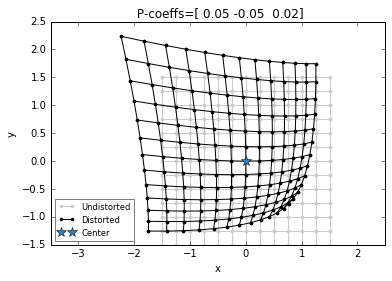

In [9]:
td3 = GeometricDistortion(Pcoeffs=[0.05, -0.05, 0.02])
print(td3)
ax = td3.plot()

Beware that some coefficient sets correspond to strong locally non-invertible distortions:

Geometric distortion: center=(+0, +0), K-coeffs=[ 0.05 -0.05], P-coeffs=[]


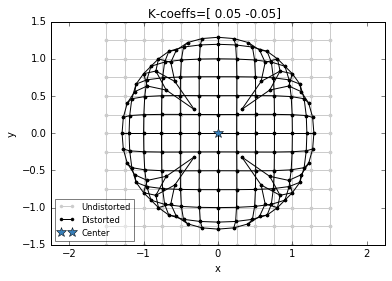

In [10]:
td4 = GeometricDistortion(Kcoeffs=[0.05, -0.05])
print(td4)
ax = td4.plot()

In [11]:
xyu = 1.5 - 1.5j
print "Before distortion:", xyu
xyd = td4.forward(xyu)
print "After distortion:", xyd
try:
    xyb = td4.backward(xyd)
    assert(N.isclose(xyu, xyb))
except RuntimeError:
    print("Distortion is not invertible.")
except AssertionError:
    print("Distortion inversion is invalid: {} vs. {}.".format(xyb, xyu))
else:
    print "After inversion:", xyb
    print("Distortion inversion is OK.")

Before distortion: (1.5-1.5j)
After distortion: (0.31875-0.31875j)
Distortion inversion is invalid: (0.316220326657-0.316220326657j) vs. (1.5-1.5j).
